In [132]:
import matplotlib.pyplot as plt
%matplotlib inline

# TP no 7 : Clustering

## K-Means

#### 1) En vous basant sur le squelette de code dans le fichier kmeans.py, implémentez l'algorithme K- Means. Le fichier termine avec un exemple de code qui vous servira de validation. Il utilise la fonction make_blobs qui permet de simuler un dataset.

In [95]:
import numpy as np
from numpy import linalg as LA

def compute_labels(X, centroids):
    """Compute labels.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    centroids: array-like, shape (n_clusters, n_features)
        The estimated centroids.

    Returns
    -------
    labels : array, shape (n_samples,)
        The labels of each sample
    """
    
    labels = []
    
    for i in range(len(X)):
        a=[]
        for j in range (len(centroids)):
            a.append(LA.norm(X[i]-centroids[j]))
        label = np.argmin(a)
        
        labels.append(label)
    
    return(np.array(labels)) 

In [124]:
def compute_inertia_centroids(X, labels):
    """Compute inertia and centroids.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    labels : array-like, shape (n_saples,)
        The labels of each sample.

    Returns
    -------
    inertia: float
        The inertia.

    centroids: array-like, shape (n_clusters, n_features)
        The estimated centroids.
    """
    centroids = np.empty([n_clusters,X.shape[1]])
    var_intra=[]
    for j in range (0,n_clusters):
        centroids[j] = (1/(len(X[labels==j])+1))*np.sum(X[labels==j],axis=0)
        var_intraj=[]
        for i in range (len(X[labels==j])):
            var_intraj.append(LA.norm(X[labels==j][i]-centroids[j]))
        var_intra.append(sum(var_intraj))
    inertia = sum(var_intra)
    
    return(inertia,centroids)

In [135]:
def kmeans(X, n_clusters, max_iter=100, tol=1e-7,random_state=42):
    """Estimate position of centroids and labels.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_clusters: int
        The desired number of clusters.

    max_iter: int, defaults 100.
        Max number of update.

    tol: float, defaults 1e-7.
        The tolerance to check convergence.

    random_state: int, defaults to 42.
        A random number generator instance.

    Returns
    -------
    centroids: array-like, shape (n_clusters, n_features)
        The estimated centroids.

    labels: array-like, shape (n_samples,)
        The estimated labels.

    inertia: float
        The inertia.
    """
    centroids = np.empty((n_clusters,X.shape[1]))
    for i in range(0,n_clusters):
        centroids[i] = X[np.random.randint(0,len(X), size=1)]
    
    inertia = 10
    inertie = []
    for i in range (0,max_iter):
        labels = compute_labels(X,centroids)
        inertia=compute_inertia_centroids(X, labels)[0]
        inertie.append(inertia)
        centroids = compute_inertia_centroids(X, labels)[1]
        i=i+1

       
    return(labels,centroids,inertie)

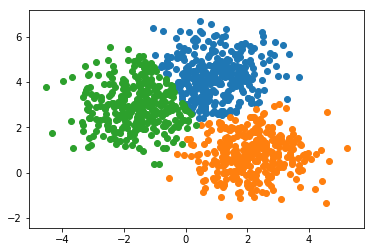

In [136]:
from sklearn.datasets import make_blobs

# Parameters
random_state = 0
n_samples = 1000
color = 'rgbcmyk'

# Generate data
X, y = make_blobs(n_samples=n_samples, random_state=random_state,
                  centers=3)

result = kmeans(X, 2, max_iter=100, tol=1e-7)
# Q1-Q4 Apply K-means to X
for j in range(n_clusters):
    plt.scatter(X[result[0]==j][:,0],X[result[0]==j][:,1])

#### 2) L'inertie décroît-elle bien au cours des itérations ? Vous acherez la décroissance de l'inertie en fonction des itérations.

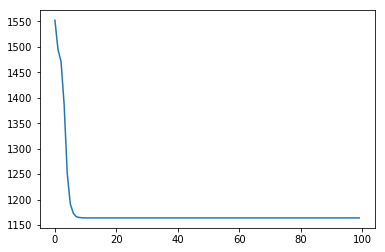

In [137]:
plt.plot(result[2])

#### 3) En faisant varier l'initialisation du générateur de nombres aléatoires, observez que la solution trouvée n'est pas toujours la même. Vous pourrez augmenter le nombre de clusters simulés pour mettre d'avantage en évidence le phénomène.

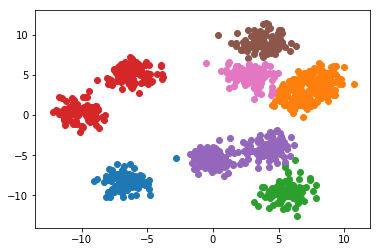

In [141]:
from sklearn.datasets import make_blobs

# Parameters
random_state = 10
n_samples = 1000
color = 'rgbcmyk'
n_clusters = 10
# Generate data
X, y = make_blobs(n_samples=n_samples, random_state=random_state,
                  centers=10)

result = kmeans(X, 2, max_iter=100, tol=1e-7)
# Q1-Q4 Apply K-means to X
for j in range(n_clusters):
    plt.scatter(X[result[0]==j][:,0],X[result[0]==j][:,1])

#### 4) Comparez votre implémentation avec celle de scikit-learn, en terme de résultat et temps de calcul. Vous pourrez utiliser la commande %%timeit d'IPython pour évaluer le temps de calcul d'une cellule du notebook. Voici un exemple d'utilisation de scikit-learn :

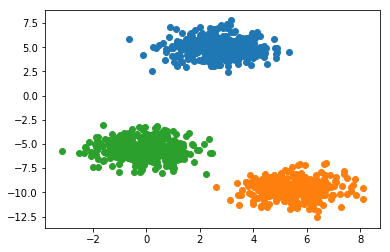

In [149]:
from sklearn import cluster
centers= 3
# Generate data
X, y = make_blobs(n_samples=n_samples, random_state=random_state,
                  centers=3)
kmeans = cluster.KMeans(n_clusters=3, n_init=10)
kmeans.fit(X)
labels = kmeans.labels_
for j in range(centers):
    plt.scatter(X[labels==j][:,0],X[labels==j][:,1])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_blobs


def compute_log_inertia(X, n_clusters, T, bb_min, bb_max,
                        random_state=0):
    """Compute the log inertia of X and X_t.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_clusters: int
        The desired number of clusters.

    T: int
        Number of draws of X_t.

    bb_min: array, shape (n_features,)
        Inferior corner of the bounding box of X.

    bb_max: array, shape (n_features,)
        Superior corner of the bounding box of X.

    random_state: int, defaults to 0.
        A random number generator instance.

    Returns
    -------
    log_inertia: float
        Log of the inertia of the K-means applied to X.

    mean_log_inertia_rand: float
        Mean of the log of the inertia of the K-means applied to the different
        X_t.

    std_log_inertia_rand: float
        Standard deviation of the log of the inertia of the K-means applied to
        the different X_t.
    """
    X_t = X[np.random.randint(0,len(X), size=1)]
    
    
    pass


def compute_gap(X, n_clusters_max, T=10, random_state=0):
    """Compute values of Gap and delta.

    Parameters
    ----------
    X: array-like, shape (n_samples, n_features)
        List of n_features-dimensional data points. Each row corresponds
        to a single data point.

    n_cluster_max: int
        Maximum number of cluster to test.

    T: int, defaults 10.
        Number of draws of X_t.

    random_state: int, defaults to 0.
        A random number generator instance.

    Returns
    -------
    n_clusters_range: array-like, shape (n_clusters_max-1,)
        Array of number of clusters tested.

    gap: array-like, shape (n_clusters_max-1,)
        Return the gap values.

    delta: array-like, shape (n_clusters_max-1,)
        Return the delta values.
    """
    pass